In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_16_3.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_16_3.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3350 - accuracy: 0.8536 - val_loss: 0.2763 - val_accuracy: 0.8768
Epoch 2/150
100000/100000 - 2s - loss: 0.2526 - accuracy: 0.8872 - val_loss: 0.2464 - val_accuracy: 0.8895
Epoch 3/150
100000/100000 - 2s - loss: 0.2336 - accuracy: 0.8956 - val_loss: 0.2343 - val_accuracy: 0.8963
Epoch 4/150
100000/100000 - 2s - loss: 0.2216 - accuracy: 0.9019 - val_loss: 0.2255 - val_accuracy: 0.8990
Epoch 5/150
100000/100000 - 3s - loss: 0.2109 - accuracy: 0.9076 - val_loss: 0.2133 - val_accuracy: 0.9063
Epoch 6/150
100000/100000 - 2s - loss: 0.1996 - accuracy: 0.9131 - val_loss: 0.2004 - val_accuracy: 0.9129
Epoch 7/150
100000/100000 - 2s - loss: 0.1869 - accuracy: 0.9191 - val_loss: 0.1912 - val_accuracy: 0.9176
Epoch 8/150
100000/100000 - 2s - loss: 0.1756 - accuracy: 0.9235 - val_loss: 0.1845 - val_accuracy: 0.9207
Epoch 9/150
100000/100000 - 2s - loss: 0.1669 - accuracy: 0.9260 - val_loss: 0.1698 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0516 - accuracy: 0.9786 - val_loss: 0.0931 - val_accuracy: 0.9639
Epoch 78/150
100000/100000 - 2s - loss: 0.0513 - accuracy: 0.9790 - val_loss: 0.0946 - val_accuracy: 0.9637
Epoch 79/150
100000/100000 - 2s - loss: 0.0484 - accuracy: 0.9801 - val_loss: 0.0935 - val_accuracy: 0.9649
Epoch 80/150
100000/100000 - 2s - loss: 0.0487 - accuracy: 0.9801 - val_loss: 0.0891 - val_accuracy: 0.9665
Epoch 81/150
100000/100000 - 2s - loss: 0.0492 - accuracy: 0.9799 - val_loss: 0.0877 - val_accuracy: 0.9666
Epoch 82/150
100000/100000 - 2s - loss: 0.0486 - accuracy: 0.9801 - val_loss: 0.0961 - val_accuracy: 0.9643
Epoch 83/150
100000/100000 - 3s - loss: 0.0478 - accuracy: 0.9804 - val_loss: 0.0878 - val_accuracy: 0.9671
Epoch 84/150
100000/100000 - 3s - loss: 0.0489 - accuracy: 0.9800 - val_loss: 0.0883 - val_accuracy: 0.9667
Epoch 85/150
100000/100000 - 2s - loss: 0.0494 - accuracy: 0.9799 - val_loss: 0.0942 - val_accuracy: 0.9651
Epoch 86/150
100000/100000 -

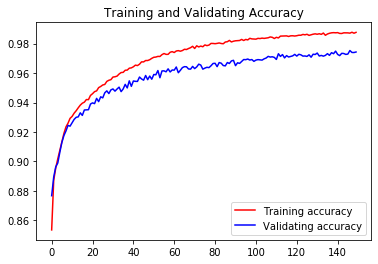

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_16_3_model.h5')

In [16]:
#json_string  = model.to_json()
#with open("C:\\Users\\Wilfred\\Desktop\\json_model.json", "w") as json_file:
#    json_file.write(json_string)

In [5]:
#model.save_weights('C:\\Users\\Wilfred\\Desktop\\Look_ahead_N_4_6_15_2_weights.h5')